🎯 PROFILAGE AVANCÉ DES SEGMENTS CLIENTS

📂 Chargement des données segmentées...
⚠️ Fichier de segmentation introuvable. Génération de données d'exemple...
✅ Données d'exemple générées

🔍 EXPLORATION DES DONNÉES
📋 Colonnes disponibles: ['customer_id', 'age', 'cluster', 'frequency', 'monetary', 'recency']
📊 Répartition des clusters:
   Cluster 0: 383 clients (38.3%)
   Cluster 1: 369 clients (36.9%)
   Cluster 2: 248 clients (24.8%)

📊 ANALYSE DESCRIPTIVE PAR SEGMENT
Variables numériques: ['age', 'frequency', 'monetary', 'recency']
Variables catégorielles: []

📈 PROFIL STATISTIQUE DÉTAILLÉ:
          age                                  frequency                      \
        count   mean median    std   min   max     count   mean median   std   
cluster                                                                        
0         383  30.68  30.37   7.39  20.0  45.0       383   4.91    5.0  2.05   
1         369  59.98  59.58   8.99  45.0  80.0       369   7.99    8.0  2.84   
2   

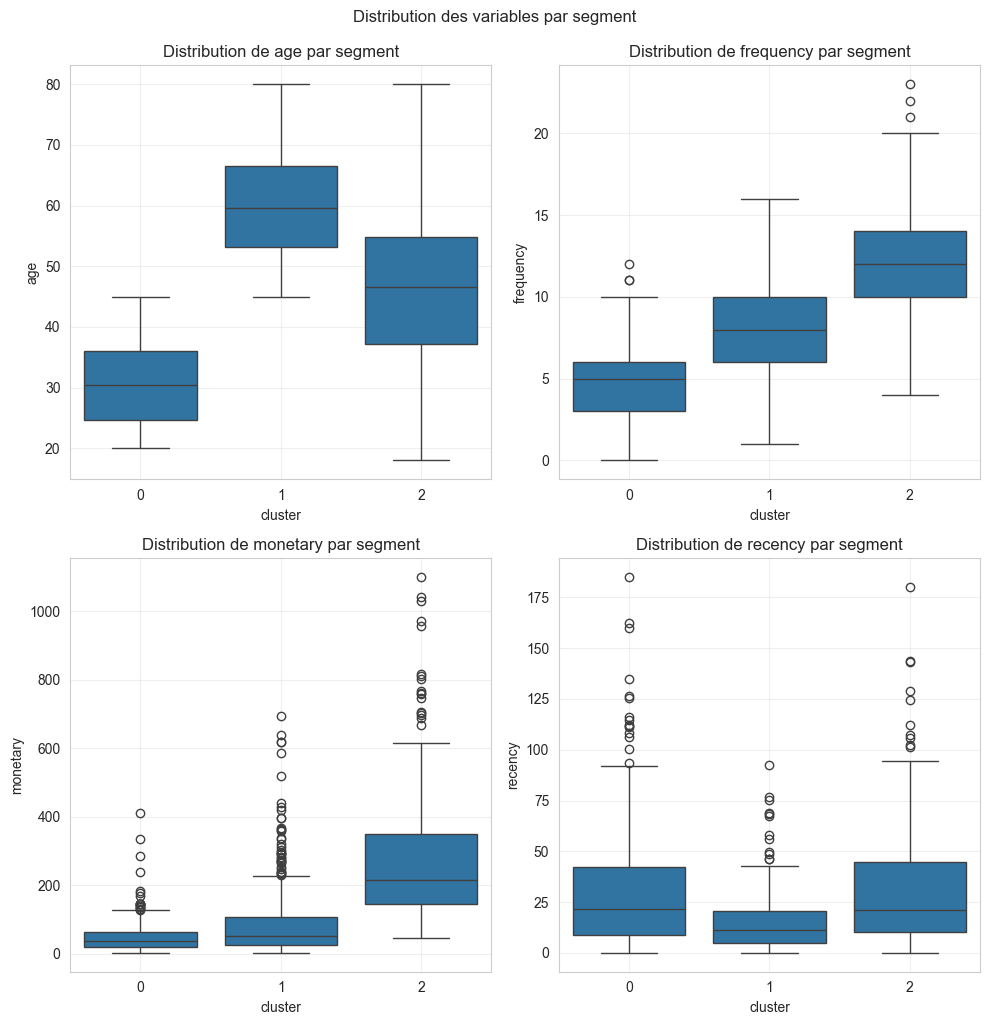

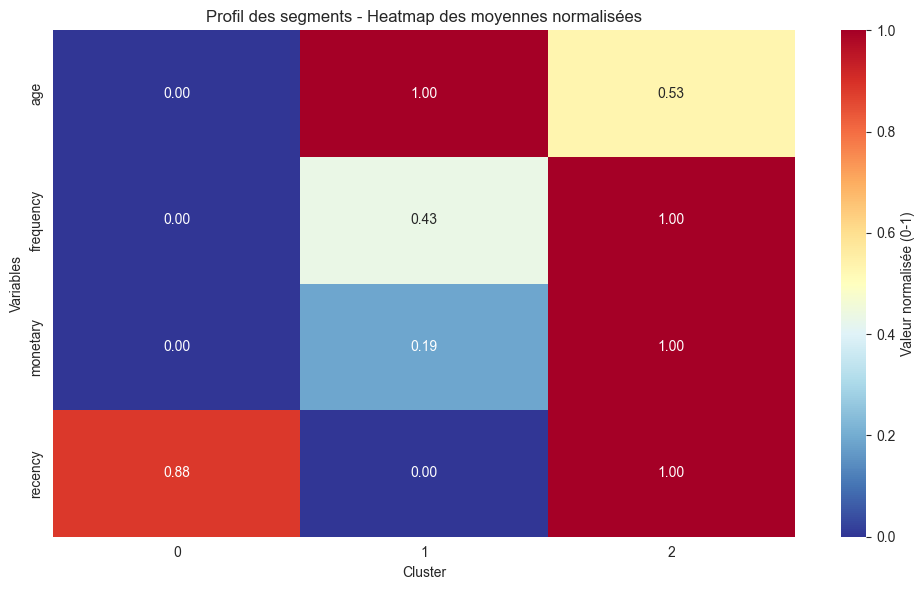

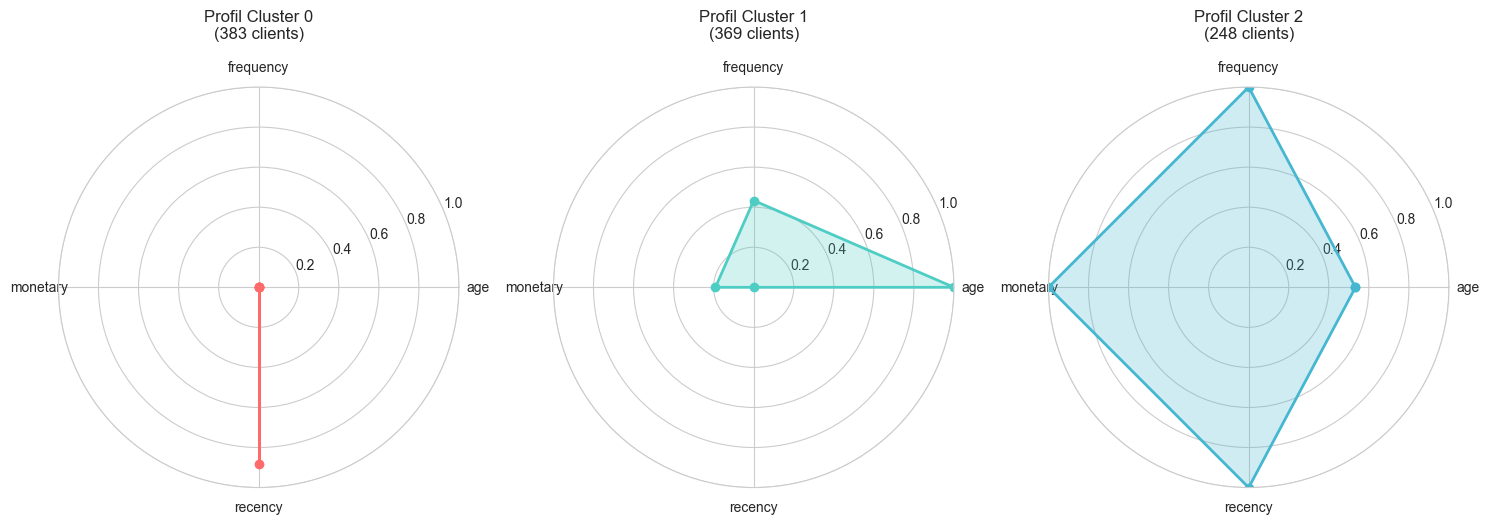


📊 ANALYSE STATISTIQUE AVANCÉE

🧮 Tests statistiques (ANOVA) :
   age: F=820.43, p=0.0000 ***
     Différences significatives pour age:
       Cluster 0 vs 1: 30.68 vs 59.98 (p=0.000)
       Cluster 0 vs 2: 30.68 vs 46.30 (p=0.000)
       Cluster 1 vs 2: 59.98 vs 46.30 (p=0.000)
   frequency: F=502.45, p=0.0000 ***
     Différences significatives pour frequency:
       Cluster 0 vs 1: 4.91 vs 7.99 (p=0.000)
       Cluster 0 vs 2: 4.91 vs 12.02 (p=0.000)
       Cluster 1 vs 2: 7.99 vs 12.02 (p=0.000)
   monetary: F=290.74, p=0.0000 ***
     Différences significatives pour monetary:
       Cluster 0 vs 1: 47.58 vs 92.18 (p=0.000)
       Cluster 0 vs 2: 47.58 vs 280.97 (p=0.000)
       Cluster 1 vs 2: 92.18 vs 280.97 (p=0.000)
   recency: F=45.51, p=0.0000 ***
     Différences significatives pour recency:
       Cluster 0 vs 1: 29.67 vs 14.95 (p=0.000)
       Cluster 1 vs 2: 14.95 vs 31.62 (p=0.000)

🎭 CRÉATION DES PERSONAS

🏷️ CLUSTER 0 (383 clients - 38.3%)
👤 Persona: Jeunes Économes
🔍 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration pour l'affichage
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

print("🎯 PROFILAGE AVANCÉ DES SEGMENTS CLIENTS")
print("=" * 60)

# 📂 Chargement des données segmentées
try:
    print("\n📂 Chargement des données segmentées...")
    
    # Essayer plusieurs sources possibles
    possible_files = [
        '../results/segmented_customers.csv',
        '../data/segmented_customers.csv',
        'segmented_customers.csv'
    ]
    
    df = None
    for file_path in possible_files:
        try:
            df = pd.read_csv(file_path)
            print(f"✅ Données chargées depuis: {file_path}")
            print(f"📊 {len(df)} clients, {df.shape[1]} variables")
            break
        except FileNotFoundError:
            continue
    
    if df is None:
        print("⚠️ Fichier de segmentation introuvable. Génération de données d'exemple...")
        # Créer des données d'exemple pour démonstration
        np.random.seed(42)
        n_customers = 1000
        
        df = pd.DataFrame({
            'customer_id': range(1, n_customers + 1),
            'age': np.random.normal(45, 15, n_customers).clip(18, 80),
            'cluster': np.random.choice([0, 1, 2], n_customers, p=[0.4, 0.35, 0.25]),
            'frequency': np.random.poisson(5, n_customers),
            'monetary': np.random.lognormal(4, 1, n_customers),
            'recency': np.random.exponential(30, n_customers)
        })
        
        # Ajuster les valeurs selon les clusters pour plus de réalisme
        for cluster in [0, 1, 2]:
            mask = df['cluster'] == cluster
            if cluster == 0:  # Jeunes actifs
                df.loc[mask, 'age'] = np.random.normal(30, 8, mask.sum()).clip(20, 45)
                df.loc[mask, 'monetary'] = np.random.lognormal(3.5, 0.8, mask.sum())
            elif cluster == 1:  # Seniors fidèles
                df.loc[mask, 'age'] = np.random.normal(60, 10, mask.sum()).clip(45, 80)
                df.loc[mask, 'frequency'] = np.random.poisson(8, mask.sum())
                df.loc[mask, 'recency'] = np.random.exponential(15, mask.sum())
            else:  # Clients premium
                df.loc[mask, 'monetary'] = np.random.lognormal(5.5, 0.7, mask.sum())
                df.loc[mask, 'frequency'] = np.random.poisson(12, mask.sum())
        
        print("✅ Données d'exemple générées")
        
except Exception as e:
    print(f"❌ Erreur: {e}")
    exit()

# 🔍 Exploration des données
print(f"\n🔍 EXPLORATION DES DONNÉES")
print("=" * 40)
print(f"📋 Colonnes disponibles: {list(df.columns)}")
print(f"📊 Répartition des clusters:")

cluster_distribution = df['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_distribution.items():
    percentage = count / len(df) * 100
    print(f"   Cluster {cluster_id}: {count:,} clients ({percentage:.1f}%)")

# 📊 ANALYSE DESCRIPTIVE PAR SEGMENT
print(f"\n📊 ANALYSE DESCRIPTIVE PAR SEGMENT")
print("=" * 50)

# Variables à analyser (détection automatique)
numeric_vars = df.select_dtypes(include=['number']).columns.tolist()
if 'cluster' in numeric_vars:
    numeric_vars.remove('cluster')
if 'customer_id' in numeric_vars:
    numeric_vars.remove('customer_id')

categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Variables numériques: {numeric_vars}")
print(f"Variables catégorielles: {categorical_vars}")

# Profil statistique détaillé par segment
profil_segment = df.groupby('cluster')[numeric_vars].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print(f"\n📈 PROFIL STATISTIQUE DÉTAILLÉ:")
print(profil_segment)

# Profil simplifié pour visualisation
profil_simple = df.groupby('cluster')[numeric_vars].agg({
    var: ['mean', 'count'] for var in numeric_vars
})

# Aplatir les colonnes multi-niveau
profil_simple.columns = ['_'.join(col).strip() for col in profil_simple.columns.values]

# Renommer la colonne de comptage (prendre la première variable pour le count)
first_count_col = [col for col in profil_simple.columns if col.endswith('_count')][0]
profil_simple = profil_simple.rename(columns={first_count_col: 'nb_clients'})
profil_simple = profil_simple[[col for col in profil_simple.columns 
                              if not (col.endswith('_count') and col != 'nb_clients')]]

print(f"\n📋 PROFIL SIMPLE PAR SEGMENT:")
print(profil_simple)

# 📊 VISUALISATIONS AVANCÉES
print(f"\n📊 GÉNÉRATION DES VISUALISATIONS...")

# 1. Distribution des variables par segment - Boxplots
n_numeric = len(numeric_vars)
if n_numeric > 0:
    fig, axes = plt.subplots(2, (n_numeric + 1) // 2, figsize=(5 * ((n_numeric + 1) // 2), 10))
    if n_numeric == 1:
        axes = [axes]
    elif n_numeric <= 2:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    for i, var in enumerate(numeric_vars):
        if i < len(axes):
            sns.boxplot(data=df, x='cluster', y=var, ax=axes[i])
            axes[i].set_title(f'Distribution de {var} par segment')
            axes[i].grid(True, alpha=0.3)
    
    # Masquer les subplots vides
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Distribution des variables par segment', y=1.02)
    plt.show()

# 2. Heatmap des moyennes par segment
if len(numeric_vars) > 1:
    plt.figure(figsize=(10, 6))
    
    # Normaliser les données pour la heatmap (0-1)
    heatmap_data = df.groupby('cluster')[numeric_vars].mean()
    heatmap_data_norm = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())
    
    sns.heatmap(heatmap_data_norm.T, annot=True, cmap='RdYlBu_r', 
                fmt='.2f', cbar_kws={'label': 'Valeur normalisée (0-1)'})
    plt.title('Profil des segments - Heatmap des moyennes normalisées')
    plt.xlabel('Cluster')
    plt.ylabel('Variables')
    plt.tight_layout()
    plt.show()

# 3. Radar chart pour chaque segment
if len(numeric_vars) >= 3:
    fig, axes = plt.subplots(1, len(cluster_distribution), 
                            figsize=(5 * len(cluster_distribution), 5),
                            subplot_kw=dict(projection='polar'))
    
    if len(cluster_distribution) == 1:
        axes = [axes]
    
    # Normalisation pour radar (0-1)
    radar_data = df.groupby('cluster')[numeric_vars].mean()
    radar_data_norm = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())
    
    angles = np.linspace(0, 2*np.pi, len(numeric_vars), endpoint=False).tolist()
    angles += angles[:1]
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    
    for i, (cluster_id, count) in enumerate(cluster_distribution.items()):
        values = radar_data_norm.loc[cluster_id].tolist()
        values += values[:1]
        
        axes[i].plot(angles, values, 'o-', linewidth=2, 
                    label=f'Cluster {cluster_id}', color=colors[i % len(colors)])
        axes[i].fill(angles, values, alpha=0.25, color=colors[i % len(colors)])
        axes[i].set_xticks(angles[:-1])
        axes[i].set_xticklabels(numeric_vars)
        axes[i].set_title(f'Profil Cluster {cluster_id}\n({count:,} clients)', 
                         size=12, y=1.1)
        axes[i].grid(True)
        axes[i].set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# 📊 ANALYSE STATISTIQUE AVANCÉE
print(f"\n📊 ANALYSE STATISTIQUE AVANCÉE")
print("=" * 40)

# Tests statistiques entre segments
print(f"\n🧮 Tests statistiques (ANOVA) :")
for var in numeric_vars:
    # Test ANOVA pour comparer les moyennes entre groupes
    groups = [df[df['cluster'] == i][var].values for i in sorted(df['cluster'].unique())]
    
    try:
        f_stat, p_value = stats.f_oneway(*groups)
        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        print(f"   {var}: F={f_stat:.2f}, p={p_value:.4f} {significance}")
        
        # Post-hoc : différences significatives entre paires de clusters
        if p_value < 0.05 and len(groups) > 2:
            print(f"     Différences significatives pour {var}:")
            means_by_cluster = df.groupby('cluster')[var].mean()
            for i in range(len(groups)):
                for j in range(i+1, len(groups)):
                    _, p_pairwise = stats.ttest_ind(groups[i], groups[j])
                    if p_pairwise < 0.05:
                        cluster_i = sorted(df['cluster'].unique())[i]
                        cluster_j = sorted(df['cluster'].unique())[j]
                        print(f"       Cluster {cluster_i} vs {cluster_j}: "
                              f"{means_by_cluster[cluster_i]:.2f} vs {means_by_cluster[cluster_j]:.2f} "
                              f"(p={p_pairwise:.3f})")
    except:
        print(f"   {var}: Test impossible")

# 🎭 CRÉATION DES PERSONAS
print(f"\n🎭 CRÉATION DES PERSONAS")
print("=" * 35)

# Analyse automatique des caractéristiques de chaque segment
personas = {}
recommendations = {}

for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    
    print(f"\n🏷️ CLUSTER {cluster_id} ({cluster_size:,} clients - {cluster_size/len(df)*100:.1f}%)")
    
    # Caractéristiques principales
    characteristics = []
    
    for var in numeric_vars:
        cluster_mean = cluster_data[var].mean()
        overall_mean = df[var].mean()
        cluster_std = cluster_data[var].std()
        overall_std = df[var].std()
        
        # Calcul du z-score pour identifier les caractéristiques saillantes
        if overall_std > 0:
            z_score = (cluster_mean - overall_mean) / overall_std
            
            if abs(z_score) > 0.5:  # Seuil pour une différence notable
                if z_score > 0:
                    characteristics.append(f"{var} élevé(e) ({cluster_mean:.1f} vs {overall_mean:.1f} global)")
                else:
                    characteristics.append(f"{var} faible ({cluster_mean:.1f} vs {overall_mean:.1f} global)")
    
    # Génération automatique de personas basée sur les caractéristiques
    if 'age' in df.columns:
        age_mean = cluster_data['age'].mean()
        if age_mean < 35:
            age_group = "Jeunes"
        elif age_mean < 55:
            age_group = "Adultes"
        else:
            age_group = "Seniors"
    else:
        age_group = "Clients"
    
    if 'monetary' in df.columns:
        monetary_mean = cluster_data['monetary'].mean()
        overall_monetary = df['monetary'].mean()
        if monetary_mean > overall_monetary * 1.5:
            spending_level = "Premium"
        elif monetary_mean < overall_monetary * 0.7:
            spending_level = "Économes"
        else:
            spending_level = "Moyens"
    else:
        spending_level = "Standards"
    
    if 'frequency' in df.columns:
        freq_mean = cluster_data['frequency'].mean()
        overall_freq = df['frequency'].mean()
        if freq_mean > overall_freq * 1.3:
            frequency_level = "Très actifs"
        elif freq_mean < overall_freq * 0.7:
            frequency_level = "Peu actifs"
        else:
            frequency_level = "Actifs"
    else:
        frequency_level = "Réguliers"
    
    persona_name = f"{age_group} {spending_level}"
    personas[cluster_id] = persona_name
    
    print(f"👤 Persona: {persona_name}")
    print(f"🔍 Caractéristiques clés:")
    for char in characteristics:
        print(f"   • {char}")
    
    # 💡 RECOMMANDATIONS STRATEGIQUES
    print(f"\n💡 Recommandations stratégiques:")
    
    reco_list = []
    
    # Recommandations basées sur la valeur monétaire
    if 'monetary' in df.columns:
        if cluster_data['monetary'].mean() > df['monetary'].mean() * 1.5:
            reco_list.extend([
                "🎯 Stratégie Premium: Offres exclusives et services VIP",
                "📈 Upselling: Proposer des produits haut de gamme",
                "🤝 Relation personnalisée: Account manager dédié"
            ])
        elif cluster_data['monetary'].mean() < df['monetary'].mean() * 0.7:
            reco_list.extend([
                "💰 Stratégie Prix: Promotions et offres économiques",
                "📦 Bundles: Packages à prix attractifs",
                "🎁 Fidélisation: Programme de points et cashback"
            ])
    
    # Recommandations basées sur la fréquence
    if 'frequency' in df.columns:
        if cluster_data['frequency'].mean() > df['frequency'].mean() * 1.3:
            reco_list.extend([
                "🔄 Automatisation: Abonnements et commandes récurrentes",
                "⭐ Fidélité: Récompenses pour la régularité"
            ])
        elif cluster_data['frequency'].mean() < df['frequency'].mean() * 0.7:
            reco_list.extend([
                "📧 Activation: Campagnes de réactivation ciblées",
                "🎯 Triggers: Notifications personnalisées"
            ])
    
    # Recommandations basées sur la récence
    if 'recency' in df.columns:
        if cluster_data['recency'].mean() > df['recency'].mean() * 1.3:
            reco_list.extend([
                "🚨 Réactivation: Campagnes de reconquête urgente",
                "🎁 Win-back: Offres spéciales de retour"
            ])
    
    # Recommandations basées sur l'âge
    if 'age' in df.columns:
        if cluster_data['age'].mean() < 35:
            reco_list.extend([
                "📱 Digital-first: Campagnes sur réseaux sociaux",
                "🎮 Gamification: Expériences interactives"
            ])
        elif cluster_data['age'].mean() > 55:
            reco_list.extend([
                "📞 Contact direct: Service client personnalisé",
                "📧 Email marketing: Communication traditionnelle"
            ])
    
    # Affichage des recommandations
    for i, reco in enumerate(reco_list[:5], 1):  # Limiter à 5 recommandations
        print(f"   {i}. {reco}")
    
    recommendations[cluster_id] = reco_list
    
    print("-" * 50)

# Ajout des personas au DataFrame
df['persona'] = df['cluster'].map(personas)

print(f"\n✅ Personas créées:")
for cluster_id, persona in personas.items():
    count = len(df[df['cluster'] == cluster_id])
    print(f"   Cluster {cluster_id}: {persona} ({count:,} clients)")

# 📊 ANALYSE SWOT PAR SEGMENT
print(f"\n📊 ANALYSE SWOT PAR SEGMENT")
print("=" * 40)

swot_analysis = {}

for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_size = len(cluster_data)
    persona = personas[cluster_id]
    
    swot = {'Forces': [], 'Faiblesses': [], 'Opportunités': [], 'Menaces': []}
    
    # Forces (basées sur les points forts du segment)
    if 'monetary' in df.columns and cluster_data['monetary'].mean() > df['monetary'].mean():
        swot['Forces'].append(f"Forte valeur client (CA moyen: {cluster_data['monetary'].mean():.0f}€)")
    
    if 'frequency' in df.columns and cluster_data['frequency'].mean() > df['frequency'].mean():
        swot['Forces'].append(f"Haute fréquence d'achat ({cluster_data['frequency'].mean():.1f} transactions)")
    
    if cluster_size > len(df) * 0.3:
        swot['Forces'].append(f"Segment important ({cluster_size:,} clients)")
    
    # Faiblesses
    if 'recency' in df.columns and cluster_data['recency'].mean() > df['recency'].mean():
        swot['Faiblesses'].append(f"Récence élevée ({cluster_data['recency'].mean():.0f} jours)")
    
    if cluster_size < len(df) * 0.2:
        swot['Faiblesses'].append(f"Segment restreint ({cluster_size:,} clients seulement)")
    
    if 'monetary' in df.columns and cluster_data['monetary'].mean() < df['monetary'].mean() * 0.8:
        swot['Faiblesses'].append(f"Faible valeur par client ({cluster_data['monetary'].mean():.0f}€)")
    
    # Opportunités (basées sur le potentiel)
    if 'age' in df.columns and cluster_data['age'].mean() < 40:
        swot['Opportunités'].append("Potentiel de croissance avec l'âge")
        swot['Opportunités'].append("Réceptif aux innovations digitales")
    
    if 'frequency' in df.columns and cluster_data['frequency'].mean() < df['frequency'].mean():
        swot['Opportunités'].append("Potentiel d'augmentation de la fréquence")
    
    # Menaces
    if 'recency' in df.columns and cluster_data['recency'].mean() > df['recency'].mean() * 1.5:
        swot['Menaces'].append("Risque élevé d'attrition")
    
    if 'age' in df.columns and cluster_data['age'].mean() > 60:
        swot['Menaces'].append("Potentiel de déclin naturel")
    
    # Compléter avec des éléments génériques si nécessaire
    if not swot['Forces']:
        swot['Forces'] = ["Segment identifié et profilé", "Base client existante"]
    if not swot['Opportunités']:
        swot['Opportunités'] = ["Personnalisation des offres", "Amélioration de l'expérience client"]
    if not swot['Menaces']:
        swot['Menaces'] = ["Concurrence accrue", "Évolution des besoins"]
    
    swot_analysis[cluster_id] = swot
    
    print(f"\n🏷️ SWOT - CLUSTER {cluster_id} ({persona})")
    print("=" * 45)
    for category, items in swot.items():
        print(f"\n{category.upper()}:")
        for item in items:
            print(f"  • {item}")

# 💾 SAUVEGARDE DES RÉSULTATS
print(f"\n💾 SAUVEGARDE DES RÉSULTATS")
print("=" * 35)

try:
    # Sauvegarde du DataFrame enrichi
    output_file = '../results/customer_profiles_detailed.csv'
    df.to_csv(output_file, index=False)
    print(f"✅ DataFrame enrichi sauvegardé: {output_file}")
    
    # Sauvegarde des profils
    profil_simple.to_csv('../results/segment_profiles.csv')
    print(f"✅ Profils des segments sauvegardés: ../results/segment_profiles.csv")
    
    # Sauvegarde des recommandations (format JSON-like)
    with open('../results/segment_recommendations.txt', 'w', encoding='utf-8') as f:
        f.write("RECOMMANDATIONS PAR SEGMENT\n")
        f.write("=" * 50 + "\n\n")
        
        for cluster_id in sorted(recommendations.keys()):
            f.write(f"CLUSTER {cluster_id} - {personas[cluster_id]}\n")
            f.write("-" * 30 + "\n")
            
            f.write("SWOT ANALYSIS:\n")
            for category, items in swot_analysis[cluster_id].items():
                f.write(f"\n{category}:\n")
                for item in items:
                    f.write(f"  • {item}\n")
            
            f.write(f"\nRECOMMENDATIONS STRATÉGIQUES:\n")
            for i, reco in enumerate(recommendations[cluster_id], 1):
                f.write(f"  {i}. {reco}\n")
            f.write("\n" + "="*50 + "\n\n")
    
    print(f"✅ Recommandations sauvegardées: ../results/segment_recommendations.txt")
    
except Exception as e:
    print(f"⚠️ Erreur lors de la sauvegarde: {e}")

print(f"\n" + "="*60)
print("✅ PROFILAGE TERMINÉ AVEC SUCCÈS!")
print("="*60)
print(f"📊 {len(df):,} clients analysés")
print(f"🎭 {len(personas)} personas créées")
print(f"📈 {len(numeric_vars)} variables analysées")
print(f"💡 Recommandations stratégiques générées pour chaque segment")
print("="*60)